__참고 링크 : https://excelsior-cjh.tistory.com/109__

In [1]:
import pandas as pd 
import plotly.offline as offline
import plotly.graph_objs as go
import requests

##### &#10004; STEP01 : 종목 code 데이터 수집
- 현재는 모든 종목 다 받아오는데, KOSPI로만 한정시키는 과정 진행해야함

In [2]:
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]

# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format) 


# 한글로된 컬럼명을 영어로 바꿔준다. 
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'}) 


# 불필요한 Columns 제거
code_df.drop(['상장일', '결산월', '지역'], axis = 1, inplace = True)

code_df.head()

,name,code,업종,주요제품,대표자명,홈페이지
0,DSR,155660,1차 비철금속 제조업,합섬섬유로프,홍석빈,http://www.dsr.com
1,GS글로벌,001250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",김태형,http://www.gsgcorp.com
2,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등","권순호, 정경구",http://www.hdc-dvp.com
3,KEC,092220,반도체 제조업,반도체 제조,박남규 김학남,http://www.kec.co.kr
4,KG동부제철,016380,1차 철강 제조업,"철강재(냉연강판,아연도강판,칼라강판,석도강판,선재류,강관,형강,봉강),비철금속 제조,도매",박성희,http://www.kgdongbusteel.co.kr


__종목코드 데이터프레임 csv로 추출하기__ 

In [3]:
#code_df.to_csv('kospi_stock', index = False)

##### &#10004; STEP02 : 특정 종목에 대한 주가데이터 수집
- 삼성전자 데이터를 수집
- 20페이지까지만 수집하기로 함 => 범위는 더 늘릴 수 있음

In [4]:
# request를 위한 user_agent 변수 설정
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36"

header = {'User-Agent': user_agent}

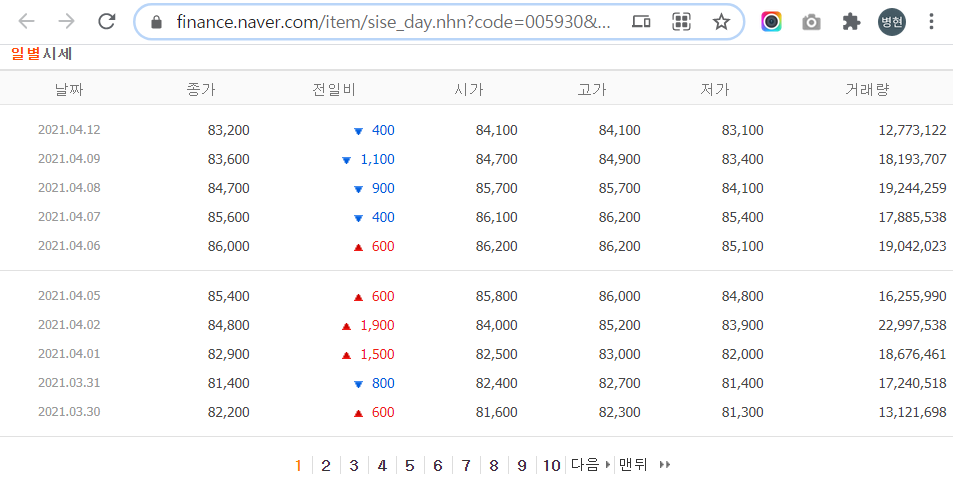

In [5]:
# 종목 이름을 입력하면 종목에 해당하는 코드를 불러옴
# 네이버 금융(http://finance.naver.com)에 넣어줌 
def get_url(item_name, code_df): 
    code = code_df[code_df['name'] == item_name]['code'].values[0]
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    
    print("요청 URL = {}".format(url)) 
    return url


# 삼성전자의 일자데이터 url 가져오기 
def get_stock_df(item_name, end_page_num = 20):
    
    url = get_url(item_name, code_df) 

    # 일자 데이터를 담을 df라는 DataFrame 정의 
    df = pd.DataFrame() 

    # 1페이지에서 20페이지의 데이터만 가져오기
    for page in range(1, end_page_num + 1):

        pg_url = '{url}&page={page}'.format(url=url, page=page) 
        print(pg_url)
        res = requests.get(pg_url, headers=header)
        df_stock = pd.read_html(res.text, header=0)[0]
        df = df.append(df_stock, ignore_index = True)

        # df.dropna()를 이용해 결측값 있는 행 제거
        df = df.dropna()

    return df

samsung_df = get_stock_df(item_name = '삼성전자')

# 상위 5개 데이터 확인하기

samsung_df

요청 URL = http://finance.naver.com/item/sise_day.nhn?code=005930
http://finance.naver.com/item/sise_day.nhn?code=005930&page=1
http://finance.naver.com/item/sise_day.nhn?code=005930&page=2
http://finance.naver.com/item/sise_day.nhn?code=005930&page=3
http://finance.naver.com/item/sise_day.nhn?code=005930&page=4
http://finance.naver.com/item/sise_day.nhn?code=005930&page=5
http://finance.naver.com/item/sise_day.nhn?code=005930&page=6
http://finance.naver.com/item/sise_day.nhn?code=005930&page=7
http://finance.naver.com/item/sise_day.nhn?code=005930&page=8
http://finance.naver.com/item/sise_day.nhn?code=005930&page=9
http://finance.naver.com/item/sise_day.nhn?code=005930&page=10
http://finance.naver.com/item/sise_day.nhn?code=005930&page=11
http://finance.naver.com/item/sise_day.nhn?code=005930&page=12
http://finance.naver.com/item/sise_day.nhn?code=005930&page=13
http://finance.naver.com/item/sise_day.nhn?code=005930&page=14
http://finance.naver.com/item/sise_day.nhn?code=005930&page=15


,날짜,종가,전일비,시가,고가,저가,거래량
0,2021.04.14,84000.0,0.0,84000.0,84300.0,83400.0,13748883.0
1,2021.04.13,84000.0,800.0,83000.0,84500.0,82800.0,15238206.0
2,2021.04.12,83200.0,400.0,84100.0,84100.0,83100.0,12915282.0
3,2021.04.09,83600.0,1100.0,84700.0,84900.0,83400.0,18193707.0
4,2021.04.08,84700.0,900.0,85700.0,85700.0,84100.0,19244259.0
...,...,...,...,...,...,...,...
199,2020.06.30,52800.0,400.0,53900.0,53900.0,52800.0,21157172.0
200,2020.06.29,52400.0,900.0,52500.0,53200.0,52000.0,17776925.0
201,2020.06.26,53300.0,1400.0,52800.0,53900.0,52200.0,21575360.0
202,2020.06.25,51900.0,1000.0,52100.0,53000.0,51900.0,18541624.0


##### &#10004; STEP03 : 수집한 데이터 프레임 정제
- 한글 변수명을 영어로 변경
- 시각화를 위해, date타입 오름차순으로 정렬

In [6]:
def refine_df(df):
# 한글로 된 컬럼명을 영어로 바꿔줌 
    df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', 
                                             '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 

    # 데이터의 타입을 int형으로 바꿔줌 
    df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 

    # 컬럼명 'date'의 타입을 date로 바꿔줌 
    df['date'] = pd.to_datetime(df['date']) 

    # 일자(date)를 기준으로 오름차순 정렬 
    df = df.sort_values(by=['date'], ascending=True) 

    # 상위 5개 데이터 확인 
    return df

samsung_df = refine_df(df = samsung_df)
samsung_df

,date,close,diff,open,high,low,volume
203,2020-06-24,52900,1500,51900,53900,51600,24519552
202,2020-06-25,51900,1000,52100,53000,51900,18541624
201,2020-06-26,53300,1400,52800,53900,52200,21575360
200,2020-06-29,52400,900,52500,53200,52000,17776925
199,2020-06-30,52800,400,53900,53900,52800,21157172
...,...,...,...,...,...,...,...
4,2021-04-08,84700,900,85700,85700,84100,19244259
3,2021-04-09,83600,1100,84700,84900,83400,18193707
2,2021-04-12,83200,400,84100,84100,83100,12915282
1,2021-04-13,84000,800,83000,84500,82800,15238206


##### &#10004; STEP04 : Plotly를 이용해 Time Series 그래프
- 동적 시각화 제공
- 여기서는 jupyter notebook만 제공하도록 했지만, 웹상으로도 제공 가능

In [7]:
#jupyter notebook에서 출력
offline.init_notebook_mode(connected = True)


def time_series_plot_fig(df, item_name):

    trace = go.Scatter(
        x = df['date'],
        y = df['close'],
        name = item_name)

    data = [trace]

    #data = [stock]
    layout = dict(
                title = '{}의 종가(close) Time Series'.format(item_name),
                xaxis = dict(
                    rangeselector = dict(
                        buttons=list([
                            dict(count = 1,
                                label = '1m',
                                step='month',
                                stepmode='backward'),
                            dict(count=3,
                                label = '3m',
                                step='month',
                                stepmode='backward'),
                            dict(count=6,
                                label='6m',
                                step='month',
                                stepmode='backward'),
                            dict(step='all')
                        ])
                    ),
                    rangeslider=dict(),
                    type='date'
                )
            )

    fig = go.Figure(data = data, layout = layout)
    return fig

samsung_fig = time_series_plot_fig(df = samsung_df, item_name = '삼성전자')

offline.iplot(samsung_fig)

> 추후, 종목 추출 및 시각화 코드는 .py로 모듈화 진행 예정

In [8]:
# jupyter notebook 에서 출력 
offline.init_notebook_mode(connected=True)


trace = go.Candlestick(x=samsung_df.date,
                       open=samsung_df.open,
                       high=samsung_df.high,
                       low=samsung_df.low,
                       close=samsung_df.close)


data = [trace] 


layout = go.Layout(title='삼성전자 캔들차트') 
fig = go.Figure(data=data, layout=layout) 
offline.iplot(fig, filename="candlestick")